In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from conda_forge_tick.utils import load_graph
from tqdm import tqdm

/home/christopher/mc/lib/python3.7/site-packages/github3/session.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable
/home/christopher/mc/lib/python3.7/site-packages/github3/structs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class GitHubIterator(models.GitHubCore, collections.Iterator):


In [3]:
cd ../cf-graph-countyfair

/home/christopher/dev/conda-forge/cf-graph-countyfair


/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
gx = load_graph()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
a = 'created_at'
b = 'closed_at'

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import datetime
import time

In [8]:
def get_datetime(s):
    return datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%SZ')

In [9]:
elapsed = []
started = []
for k, node in tqdm(gx.nodes.items()):
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"] and pr['data']['migrator_name'] == 'Version':
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

100%|██████████| 11371/11371 [01:28<00:00, 128.74it/s]


In [10]:
df = pd.DataFrame({'elapsed': elapsed, 'started': started})
df = df.set_index('started')
df.index = pd.to_datetime(df.index, utc=True)
df.index = pd.DatetimeIndex(df.index)

In [11]:
elapsed = []
started = []
for k, node in tqdm(gx.nodes.items()):
    prs = node.get('payload', {}).get('PRed', [])
    for pr in prs: 
        if 'PR' in pr and a in pr["PR"] and pr['data']['migrator_name'] != 'Version':
            start = get_datetime(pr['PR'][a])
            started.append(start)
            finish = get_datetime(pr['PR'][b]) if pr['PR'][b] else pd.NaT
            elapsed.append((finish-start).total_seconds())

100%|██████████| 11371/11371 [00:00<00:00, 12568.40it/s]


In [12]:
df2 = pd.DataFrame({'elapsed': elapsed, 'started': started})
df2 = df2.set_index('started')
df2.index = pd.to_datetime(df2.index, utc=True)
df2.index = pd.DatetimeIndex(df2.index)

In [17]:
cd ../by-the-numbers

/home/christopher/dev/conda-forge/by-the-numbers


/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
len(df), len(df2), sum((len(df), len(df2)))

(42375, 21104, 63479)

In [19]:
df['count'] = [1] * len(df)
df2['count'] = [1] * len(df2)

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


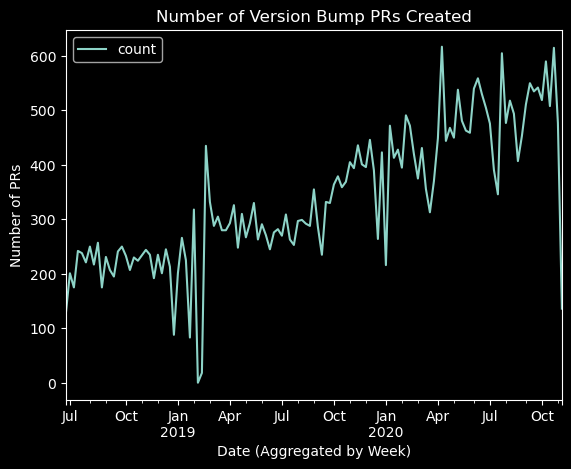

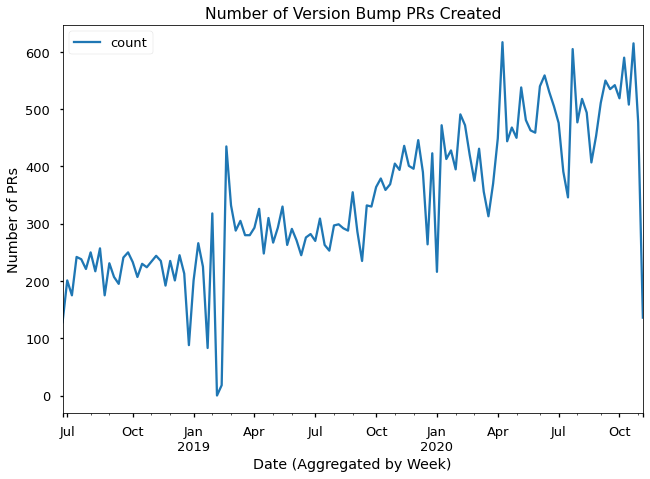

In [23]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3 = df.resample('W').sum().plot(y='count', ax=ax)
        ax.set_title(f"Number of Version Bump PRs Created")
        ax.set_xlabel("Date (Aggregated by Week)")
        ax.set_ylabel("Number of PRs")
        fig.savefig(f"plots/version_bumps-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)

/home/christopher/mc/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


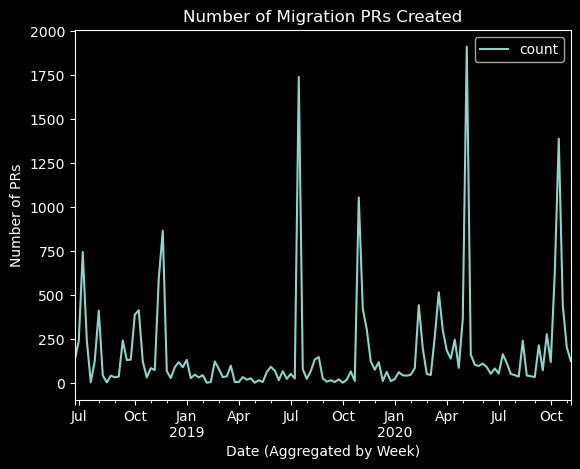

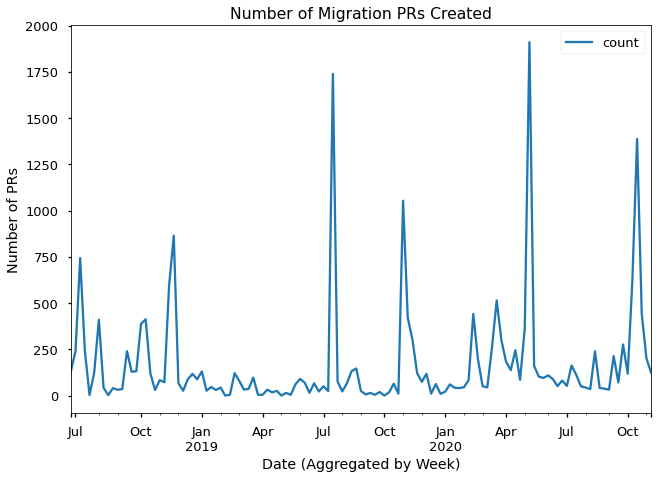

In [24]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3 = df2.resample('W').sum().plot(y='count', ax=ax)
        ax.set_title(f"Number of Migration PRs Created")
        ax.set_xlabel("Date (Aggregated by Week)")
        ax.set_ylabel("Number of PRs")
        fig.savefig(f"plots/migrations-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)

In [ ]:
print(len(df), len(df) - df['elapsed'].count(), (len(df) - df['elapsed'].count())/len(df) * 100)

In [ ]:
print(len(df2), len(df2) - df2['elapsed'].count(), (len(df2) - df2['elapsed'].count())/len(df2) * 100)